<a href="https://colab.research.google.com/github/dataanalysisj7/dataanalysis/blob/main/Visualiza%C3%A7%C3%A3o_de_a%C3%A7%C3%B5es_de_bancos_brasileiros.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Visualização de preço de ações

In [2]:
!pip install yfinance

## Importação das bibliotecas

In [3]:
import pandas as pd
import numpy as np
from pandas_datareader import data
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import yfinance as yf

## Base de dados com uma ação

## Base de dados (Bancos brasileiros)

In [5]:
acoes = ['BBDC4.SA', 'ITUB4.SA', 'BRSR3.SA', 'BAZA3.SA', 'BBAS3.SA','NU', 'BOVA11.SA']

In [6]:
acoes_df = pd.DataFrame()
for acao in acoes:
  #acoes_df[acao] = data.DataReader(acao, data_source='yahoo', start='2015-01-01')['Close']
  acoes_df[acao] = yf.download(acao, start='2015-01-01')['Close']

/tmp/ipython-input-2735453705.py:4: FutureWarning: YF.download() has changed argument auto_adjust default to True
  acoes_df[acao] = yf.download(acao, start='2015-01-01')['Close']
[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-2735453705.py:4: FutureWarning: YF.download() has changed argument auto_adjust default to True
  acoes_df[acao] = yf.download(acao, start='2015-01-01')['Close']
[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-2735453705.py:4: FutureWarning: YF.download() has changed argument auto_adjust default to True
  acoes_df[acao] = yf.download(acao, start='2015-01-01')['Close']
[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-2735453705.py:4: FutureWarning: YF.download() has changed argument auto_adjust default to True
  acoes_df[acao] = yf.download(acao, start='2015-01-01')['Close']
[*********************100%***********************]  1 of 1 completed
/tmp

In [7]:
acoes_df

,BBDC4.SA,ITUB4.SA,BRSR3.SA,BAZA3.SA,BBAS3.SA,NU,BOVA11.SA
Date,,,,,,,
2015-01-02,7.474646,9.368996,6.21444,10.173891,5.514333,NaN,47.259998
2015-01-05,7.490062,9.416075,6.21444,10.173891,5.399906,NaN,46.320000
2015-01-06,7.736463,9.568394,6.21444,9.766933,5.475380,NaN,46.580002
2015-01-07,8.043913,9.914574,6.21444,10.173891,5.716401,NaN,48.150002
2015-01-08,8.085343,10.069666,6.21444,10.173891,5.735882,NaN,48.509998
...,...,...,...,...,...,...,...
2025-12-01,19.331026,41.282349,15.07000,74.510002,22.142996,17.480000,155.500000
2025-12-02,19.540001,42.220001,15.22000,74.980003,22.514166,17.610001,157.970001
2025-12-03,19.000000,42.220001,15.22000,75.000000,22.379999,17.440001,158.399994


In [8]:
acoes_df = acoes_df.rename(columns={'BBDC4.SA' : 'BRADESCO', 'ITUB4.SA' : 'ITAU', 'BRSR3.SA' : 'BANRISUL', 'BAZA3.SA' :'BASA', 'BBAS3.SA' : 'BB','NU' : 'NUBANK', 'BOVA11.SA' : 'IBOVESPA'})

In [9]:
acoes_df.columns[0:]

Index(['BRADESCO', 'ITAU', 'BANRISUL', 'BASA', 'BB', 'NUBANK', 'IBOVESPA'], dtype='object')

In [10]:
acoes_df.head()

,BRADESCO,ITAU,BANRISUL,BASA,BB,NUBANK,IBOVESPA
Date,,,,,,,
2015-01-02,7.474646,9.368996,6.21444,10.173891,5.514333,NaN,47.259998
2015-01-05,7.490062,9.416075,6.21444,10.173891,5.399906,NaN,46.320000
2015-01-06,7.736463,9.568394,6.21444,9.766933,5.475380,NaN,46.580002
2015-01-07,8.043913,9.914574,6.21444,10.173891,5.716401,NaN,48.150002
2015-01-08,8.085343,10.069666,6.21444,10.173891,5.735882,NaN,48.509998


In [11]:
acoes_df.isnull().sum()

,0
BRADESCO,0
ITAU,0
BANRISUL,0
BASA,0
BB,0
NUBANK,1752
IBOVESPA,27


In [12]:
acoes_df.shape

(2722, 7)

In [13]:
acoes_df.dropna(inplace=True)

In [14]:
acoes_df.shape

(970, 7)

In [15]:
acoes_df.isnull().sum()

,0
BRADESCO,0
ITAU,0
BANRISUL,0
BASA,0
BB,0
NUBANK,0
IBOVESPA,0


In [16]:
acoes_df.to_csv('acoes.csv')

In [17]:
acoes_df = pd.read_csv('acoes.csv')
acoes_df

,Date,BRADESCO,ITAU,BANRISUL,BASA,BB,NUBANK,IBOVESPA
0,2021-12-09,13.699817,16.018553,8.756464,26.867113,11.492807,10.330000,102.139999
1,2021-12-10,13.645801,16.040270,8.837476,26.329771,11.665092,11.850000,103.730003
2,2021-12-13,13.395980,15.613200,8.830110,26.867113,11.568178,10.810000,103.500000
3,2021-12-14,13.598538,15.765209,8.947943,26.867113,11.569983,9.920000,102.699997
4,2021-12-15,13.598538,15.714539,8.947943,26.867113,11.371496,10.010000,103.199997
...,...,...,...,...,...,...,...,...
965,2025-12-01,19.331026,41.282349,15.070000,74.510002,22.142996,17.480000,155.500000
966,2025-12-02,19.540001,42.220001,15.220000,74.980003,22.514166,17.610001,157.970001
967,2025-12-03,19.000000,42.220001,15.220000,75.000000,22.379999,17.440001,158.399994
968,2025-12-04,19.270000,43.259998,15.480000,75.529999,22.770000,17.650000,161.289993


In [18]:
acoes_df.columns[1:]

Index(['BRADESCO', 'ITAU', 'BANRISUL', 'BASA', 'BB', 'NUBANK', 'IBOVESPA'], dtype='object')

In [19]:
acoes_df.describe()

,BRADESCO,ITAU,BANRISUL,BASA,BB,NUBANK,IBOVESPA
count,970.000000,970.000000,970.000000,970.000000,970.000000,970.000000,970.000000
mean,13.316324,25.337067,10.773137,63.035442,20.094796,9.344000,118.223103
std,1.996944,6.739121,1.519350,21.130770,4.954878,3.799725,13.100699
min,10.095753,15.164426,8.215016,25.745409,10.238317,3.330000,92.550003
25%,11.680022,19.508670,9.227623,39.935562,15.653718,5.512500,107.515001
50%,13.186418,25.023232,10.897448,71.616398,21.083965,9.045000,117.954998
75%,14.653813,29.309188,11.766844,81.044052,24.353338,12.315000,126.807499
max,19.630730,43.259998,15.480000,94.296532,29.063505,17.650000,161.289993


## Visualização e normalização

In [22]:
len(acoes_df.columns)

8

In [23]:
np.arange(1, len(acoes_df.columns))

array([1, 2, 3, 4, 5, 6, 7])

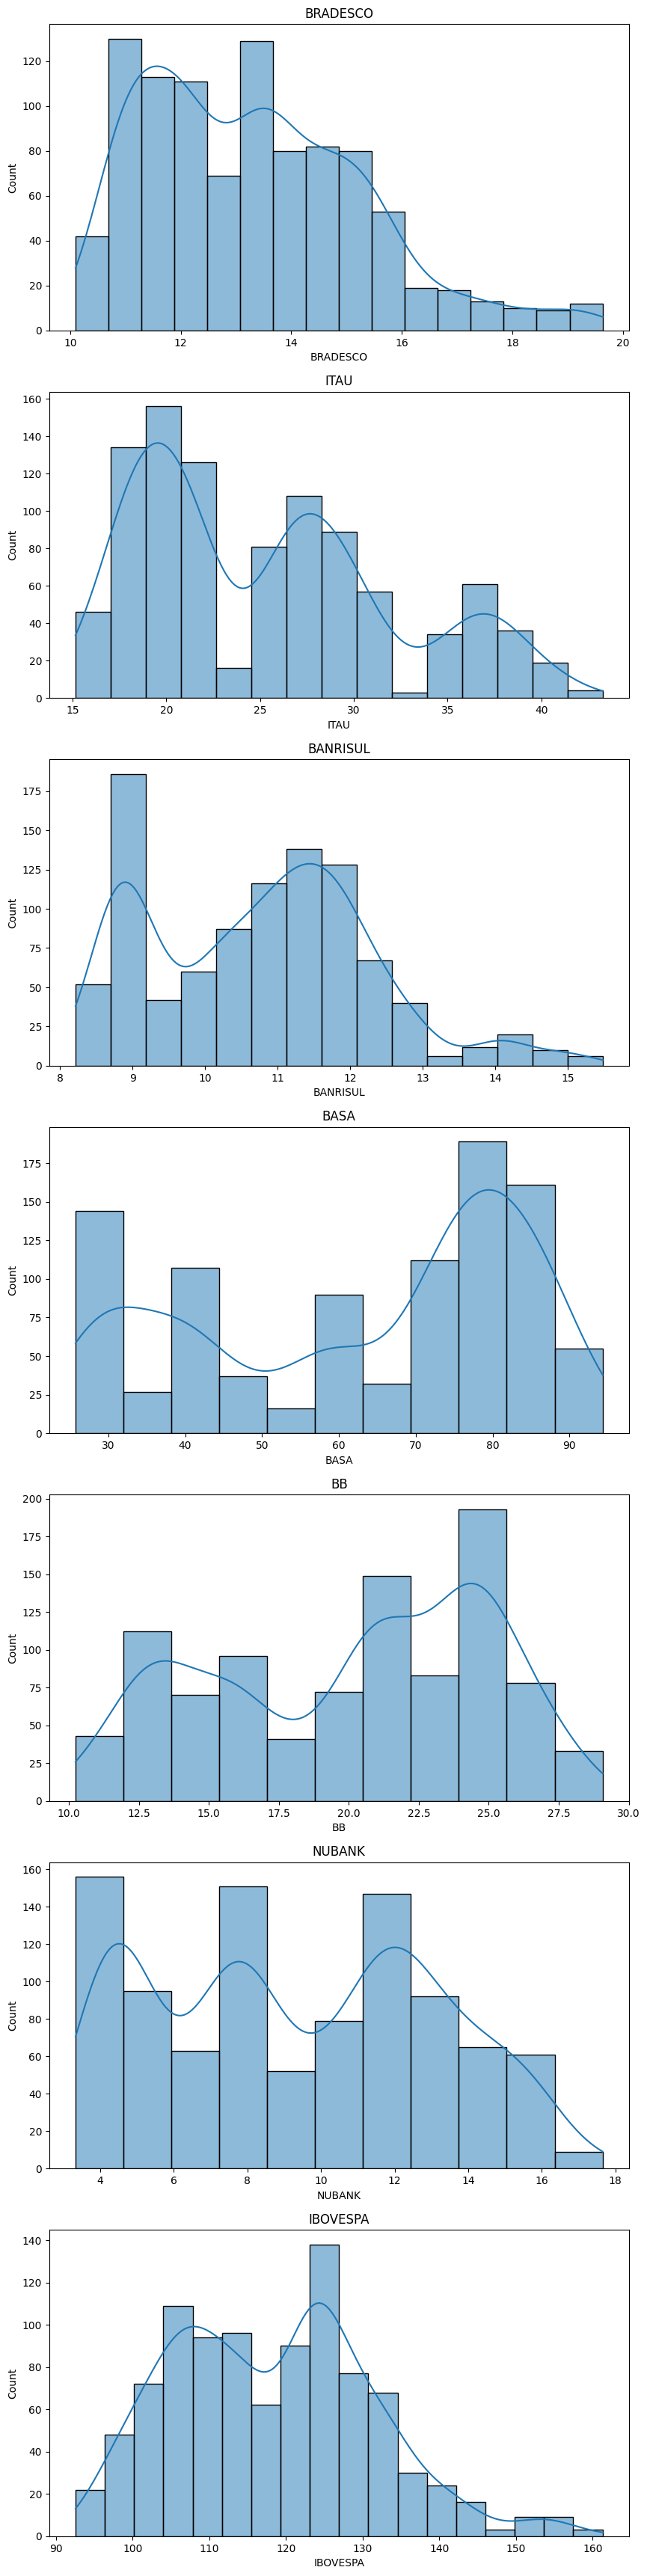

In [25]:
plt.figure(figsize=(10,50))
i = 1
for i in np.arange(1, len(acoes_df.columns)):
  plt.subplot(8, 1, i + 1)
  sns.histplot(acoes_df[acoes_df.columns[i]], kde = True)
  plt.title(acoes_df.columns[i])

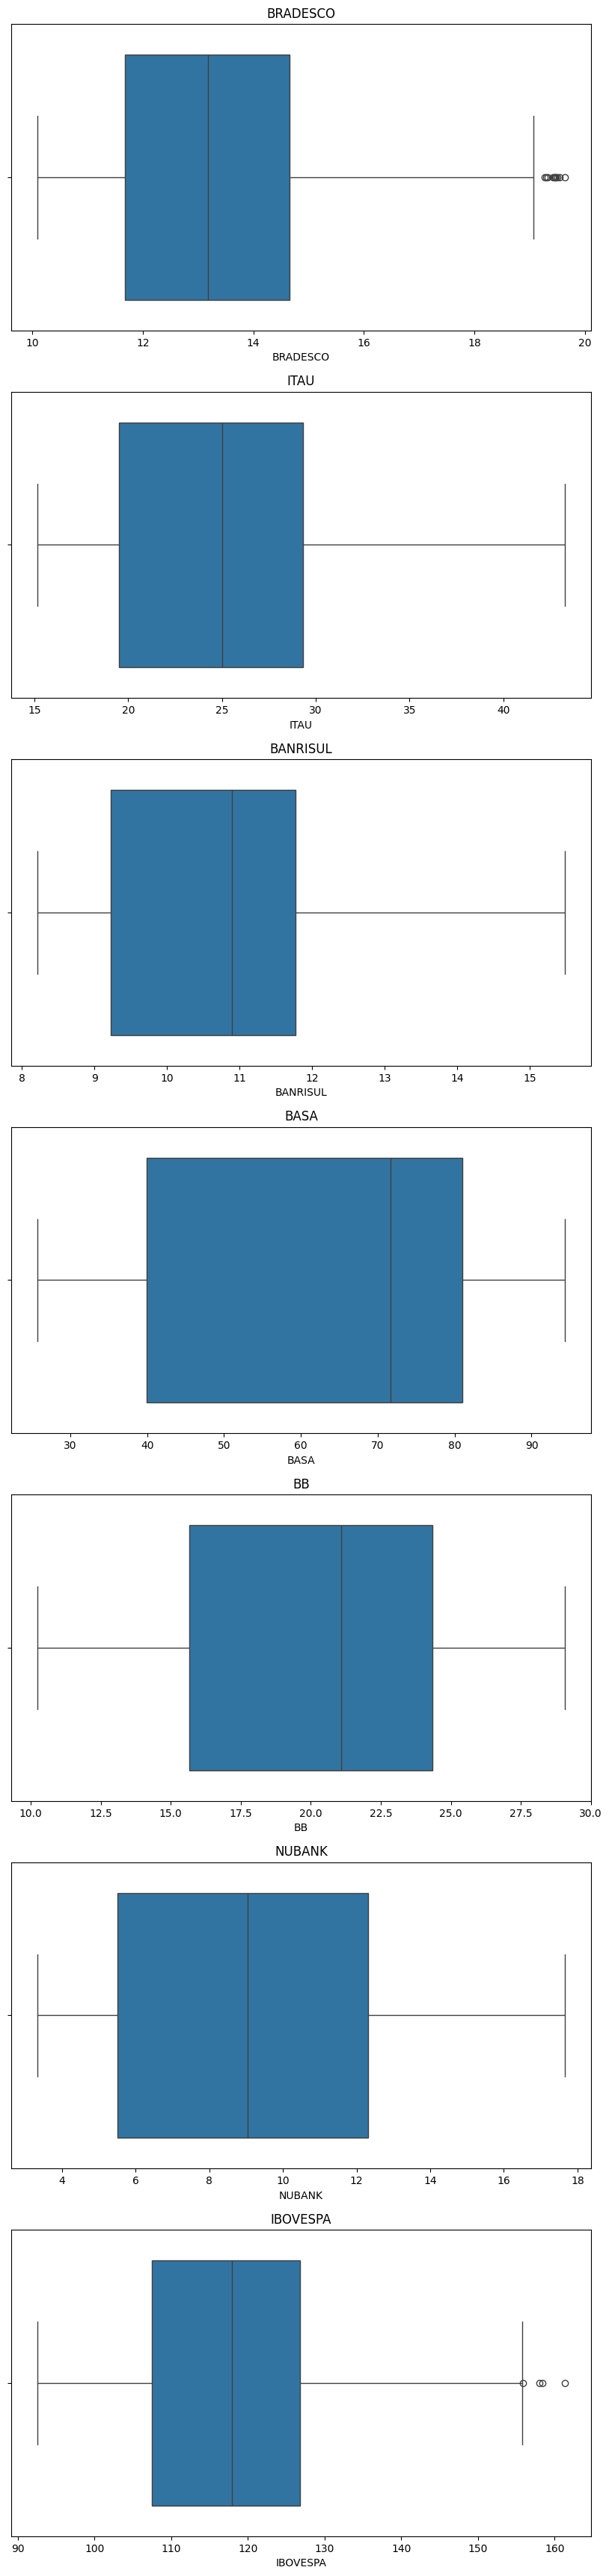

In [26]:
plt.figure(figsize=(10,50))
i = 1
for i in np.arange(1, len(acoes_df.columns)):
  plt.subplot(8, 1, i + 1)
  sns.boxplot(x = acoes_df[acoes_df.columns[i]])
  plt.title(acoes_df.columns[i])

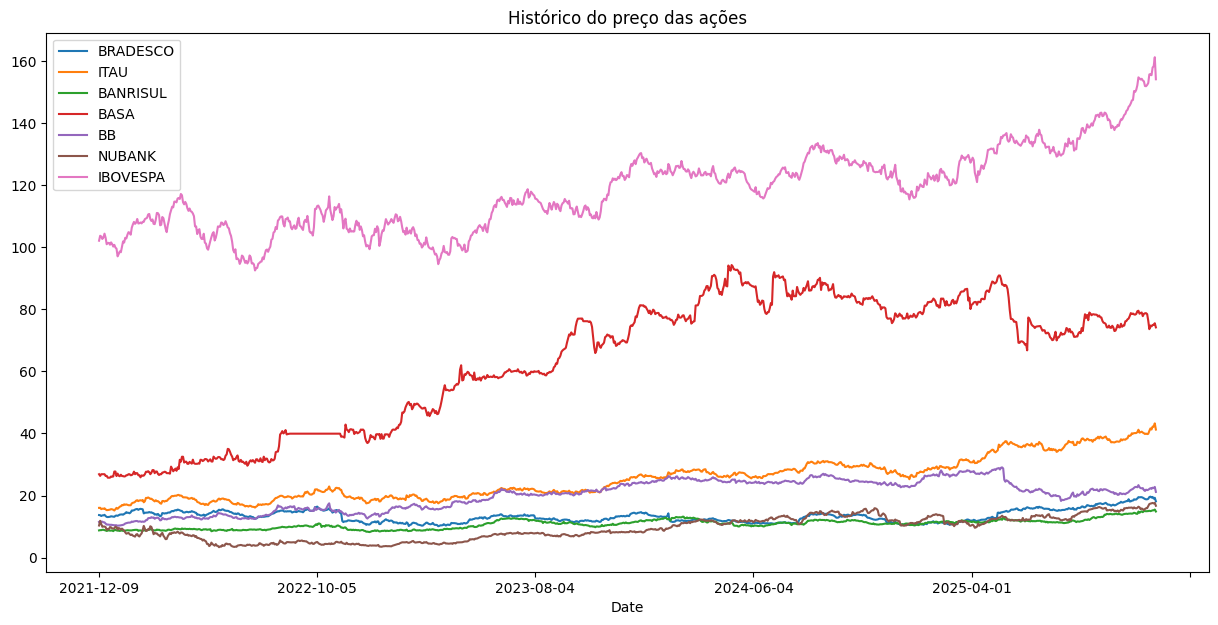

In [27]:
acoes_df.plot(x = 'Date', figsize = (15,7), title = 'Histórico do preço das ações');

In [28]:
acoes_df

,Date,BRADESCO,ITAU,BANRISUL,BASA,BB,NUBANK,IBOVESPA
0,2021-12-09,13.699817,16.018553,8.756464,26.867113,11.492807,10.330000,102.139999
1,2021-12-10,13.645801,16.040270,8.837476,26.329771,11.665092,11.850000,103.730003
2,2021-12-13,13.395980,15.613200,8.830110,26.867113,11.568178,10.810000,103.500000
3,2021-12-14,13.598538,15.765209,8.947943,26.867113,11.569983,9.920000,102.699997
4,2021-12-15,13.598538,15.714539,8.947943,26.867113,11.371496,10.010000,103.199997
...,...,...,...,...,...,...,...,...
965,2025-12-01,19.331026,41.282349,15.070000,74.510002,22.142996,17.480000,155.500000
966,2025-12-02,19.540001,42.220001,15.220000,74.980003,22.514166,17.610001,157.970001
967,2025-12-03,19.000000,42.220001,15.220000,75.000000,22.379999,17.440001,158.399994
968,2025-12-04,19.270000,43.259998,15.480000,75.529999,22.770000,17.650000,161.289993


In [29]:
acoes_df_normalizado = acoes_df.copy()
for i in acoes_df_normalizado.columns[1:]:
  acoes_df_normalizado[i] = acoes_df_normalizado[i] / acoes_df_normalizado[i][0]

In [30]:
acoes_df_normalizado

,Date,BRADESCO,ITAU,BANRISUL,BASA,BB,NUBANK,IBOVESPA
0,2021-12-09,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,2021-12-10,0.996057,1.001356,1.009252,0.980000,1.014991,1.147144,1.015567
2,2021-12-13,0.977822,0.974695,1.008410,1.000000,1.006558,1.046467,1.013315
3,2021-12-14,0.992607,0.984184,1.021867,1.000000,1.006715,0.960310,1.005483
4,2021-12-15,0.992607,0.981021,1.021867,1.000000,0.989445,0.969022,1.010378
...,...,...,...,...,...,...,...,...
965,2025-12-01,1.411043,2.577158,1.721014,2.773279,1.926683,1.692159,1.522420
966,2025-12-02,1.426297,2.635694,1.738145,2.790773,1.958979,1.704744,1.546603
967,2025-12-03,1.386880,2.635694,1.738145,2.791517,1.947305,1.688287,1.550813
968,2025-12-04,1.406588,2.700618,1.767837,2.811244,1.981239,1.708616,1.579107


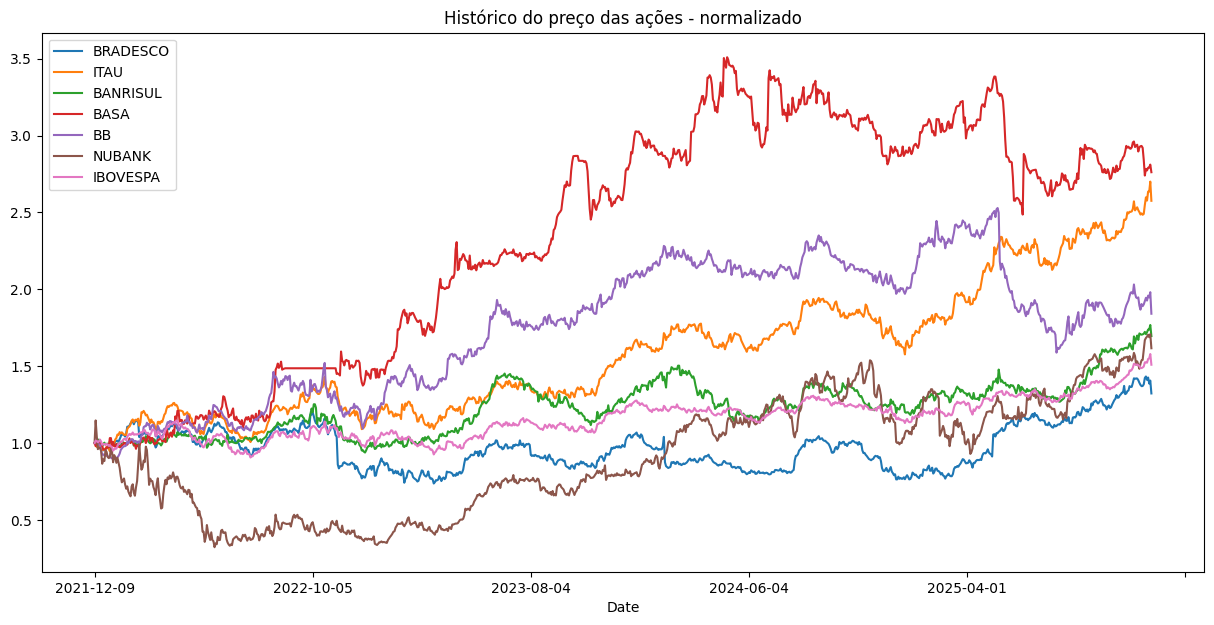

In [31]:
acoes_df_normalizado.plot(x = 'Date', figsize = (15,7), title = 'Histórico do preço das ações - normalizado');

In [32]:
figura = px.line(title = 'Histórico do preço das ações')
for i in acoes_df.columns[1:]:
  figura.add_scatter(x = acoes_df['Date'], y = acoes_df[i], name = i)
figura.show()

In [33]:
figura = px.line(title = 'Histórico do preço das ações - normalizado')
for i in acoes_df_normalizado.columns[1:]:
  figura.add_scatter(x = acoes_df_normalizado['Date'], y = acoes_df_normalizado[i], name = i)
figura.show()